In [3]:
import networkx as nx
import matplotlib.pyplot as plt

In [4]:
G = nx.read_gml('internet/as-22july06.gml', label=None)

In [2]:
def print_graph_info(G):
    print(f'Number of nodes: {G.number_of_nodes()}')
    print(f'Number of edges: {G.number_of_edges()}')

In [4]:
print_graph_info(G)

Number of nodes: 22963
Number of edges: 48436


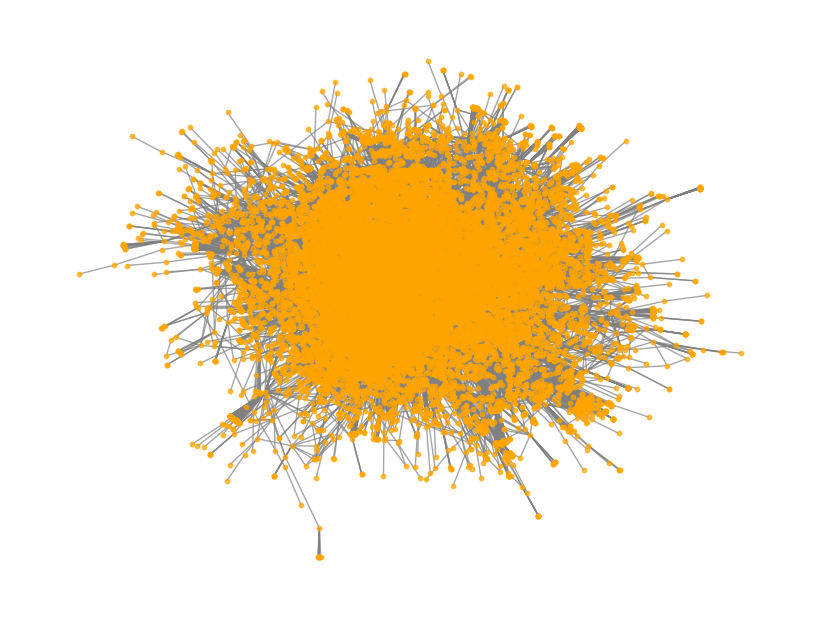

In [6]:
# def visualize_graph(input_graph):
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=False,
         node_color='orange',
           edge_color='gray',
             node_size=10,
               alpha=0.7)

# Question #1

### Finidng Influential Nodes in a Graph

In [6]:
from collections import defaultdict

def calculate_centralities(graph, weights=None):
    degree_centrality = nx.degree_centrality(graph)
    pagerank = nx.pagerank(graph)
    eigenvector_centrality = nx.eigenvector_centrality(graph, max_iter=1000)

    if weights is None:
        weights = {
                'degree': 1.0,
                'eigenvector': 1.0,
                'pagerank': 1.0
        }
    measures = {
        'degree': degree_centrality,
        'eigenvector': eigenvector_centrality,
        'pagerank': pagerank
    }

    # Normalize weights to sum to 1
    total_weight = sum(weights.values())
    normalized_weights = {k: v/total_weight for k, v in weights.items()}
    
    # Calculate weighted scores
    weighted_scores = defaultdict(float)
    for node in graph.nodes():
        for measure, scores in measures.items():
            weighted_scores[node] += scores[node] * normalized_weights[measure]
    
    return dict(weighted_scores)


In [ ]:
custom_weights = {
    'degree': 0.8,      # Strong emphasis on direct connections
    'eigenvector': 1.0, # Standard importance
    'pagerank': 0.7     # Moderate importance
}

# Calculate weighted centrality
weighted_centrality = calculate_centralities(G, weights=custom_weights)

# Get top 10 nodes by weighted score
top_10_nodes = dict(sorted(weighted_centrality.items(), 
                          key=lambda item: item[1], 
                          reverse=True)[:10])

# Print results
print("Top 10 Most Influential Nodes (Weighted Average):")
print("{:<10} {:<15} {}".format("Rank", "Node", "Weighted Score"))
print("-"*35)
for rank, (node, score) in enumerate(top_10_nodes.items(), 1):
    print("{:<10} {:<15} {:.4f}".format(rank, node, score))


Top 10 Most Influential Nodes (Weighted Average):
Rank       Node            Weighted Score
-----------------------------------
1          3               0.1374
2          2               0.1117
3          14              0.1052
4          22              0.1000
5          26              0.0820
6          38              0.0797
7          58              0.0795
8          11              0.0745
9          15              0.0719
10         54              0.0656


Text(0.5, 1.0, 'Top 10 Most Influential Nodes (Weighted Centrality)\nNode Size = Influence Score')

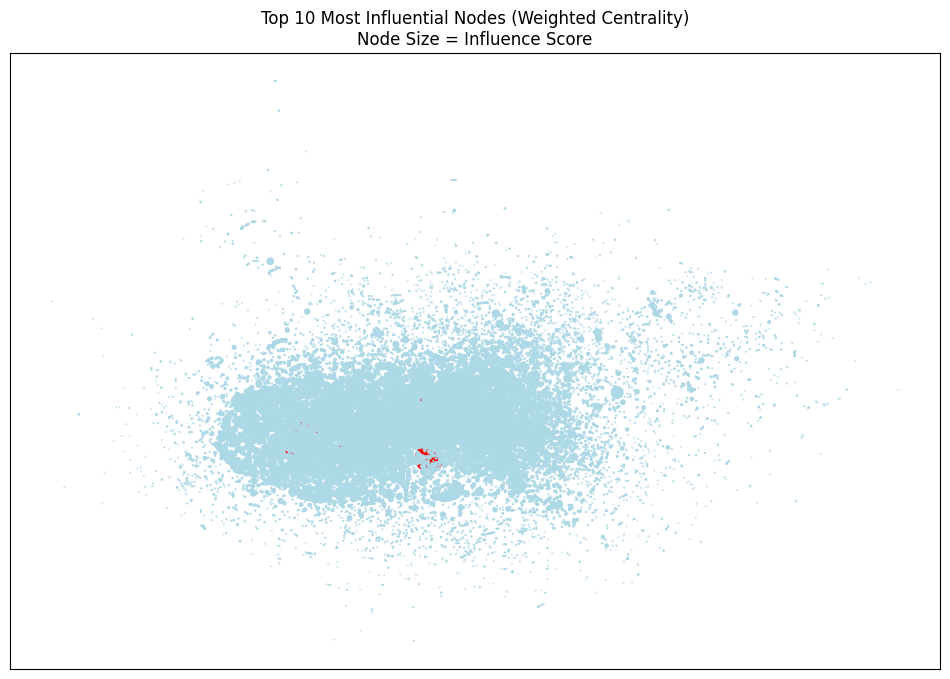

In [19]:
# Visualization
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)

# Draw the base graph
# nx.draw(G, pos, with_labels=False, node_color='lightblue', edge_color='gray', alpha=0.7)

# Highlight top nodes with size proportional to their score
node_sizes = [weighted_centrality[node] * 5000 for node in G.nodes()]
node_colors = ['red' if node in top_10_nodes else 'lightblue' for node in G.nodes()]

nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors)
# nx.draw_networkx_labels(G, pos, font_size=10)

plt.title("Top 10 Most Influential Nodes (Weighted Centrality)\nNode Size = Influence Score")

## Question #2

In [ ]:
import random
from networkx.algorithms.community import greedy_modularity_communities

# detect clusters 
def detect_communities(G):
    communities = list(greedy_modularity_communities(G)) 
    return communities

In [10]:
all_communities = detect_communities(G)

In [11]:
print("Length of the :", len(all_communities))
print(type(all_communities))
print(all_communities)

Length of the : 43
<class 'list'>
[frozenset({2, 3, 14, 16, 16402, 24, 32, 53, 54, 90, 91, 92, 93, 94, 102, 108, 116, 129, 130, 144, 145, 146, 147, 148, 149, 150, 152, 153, 154, 155, 157, 158, 159, 160, 161, 162, 165, 168, 169, 170, 171, 172, 174, 175, 176, 177, 180, 181, 182, 185, 188, 189, 190, 191, 193, 194, 196, 197, 198, 199, 200, 201, 202, 203, 204, 208, 209, 211, 214, 215, 216, 217, 218, 219, 220, 225, 226, 227, 230, 231, 232, 233, 234, 236, 237, 241, 242, 243, 246, 247, 248, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 283, 286, 287, 288, 289, 290, 291, 293, 294, 296, 297, 298, 299, 302, 305, 306, 307, 308, 312, 313, 314, 316, 317, 318, 320, 321, 322, 323, 324, 325, 326, 327, 328, 330, 331, 332, 333, 334, 335, 336, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 350, 352, 353, 355, 356, 357, 359, 360, 362, 363, 364, 366, 368, 369, 371, 372, 373, 374, 376, 377, 37

In [12]:
def find_important_clusters(important_nodes, communities):
    # Map nodes to their corresponding clusters
    node_to_cluster = {}
    for cluster_id, community in enumerate(communities):
        for node in community:
            node_to_cluster[node] = cluster_id
    # Count how many important nodes are in each cluster
    cluster_importance = {}
    for node in important_nodes:
        cluster_id = node_to_cluster.get(node, None)
        if cluster_id is not None:
            if cluster_id not in cluster_importance:
                cluster_importance[cluster_id] = 0
            cluster_importance[cluster_id] += 1
            
    # Rank clusters based on the number of important nodes they contain
    sorted_clusters = sorted(cluster_importance.items(), key=lambda x: x[1], reverse=True)
    print(sorted_clusters[0:5])

    most_important_clusters = [list(communities[cluster_id]) for cluster_id, _ in sorted_clusters[:5]]
    
    return most_important_clusters

In [13]:
page_rank= nx.pagerank(G)
important_nodes_based_pagerank = sorted(page_rank.items(), key=lambda x:x[1], reverse=True)[:10]
important_nodes_based_pagerank = [item[0] for item in important_nodes_based_pagerank]
important_nodes_based_pagerank

[3, 2, 14, 54, 58, 22, 55, 157, 39, 26]

In [14]:
# This is taken from Question #1
important_nodes_based_all = [3, 2, 14, 22, 26, 38, 58, 11, 15, 54]

In [15]:
important_clusters_based_pagerank = find_important_clusters(important_nodes_based_pagerank, all_communities)
important_clusters_based_all = find_important_clusters(important_nodes_based_all, all_communities)

[(0, 5), (4, 1), (3, 1), (5, 1), (7, 1)]
[(0, 4), (1, 4), (3, 1), (4, 1)]


In [16]:
def visualize_top_clusters(G, top_clusters):
    # all nodes from the top clusters
    top_nodes = set(node for cluster in top_clusters for node in cluster)

    # only the nodes from the top clusters
    subgraph = G.subgraph(top_nodes)

    colors = ['#CF0F47', '#FFDEDE', '#B5FCCD', '#E78B48', '#9ACBD0']

    # Map nodes to cluster colors
    node_color_map = {}
    for cluster_id, cluster in enumerate(top_clusters):
        for node in cluster:
            node_color_map[node] = colors[cluster_id]

    node_colors = [node_color_map[node] for node in subgraph.nodes()]

    # visualize 
    plt.figure(figsize=(12, 10))
    pos = nx.spring_layout(subgraph, seed=42)
    nx.draw(subgraph, pos, node_color=node_colors, with_labels=False, node_size=50, alpha=0.8, edge_color="gray")
    plt.title("Top 5 Most Important Clusters")
    plt.show()


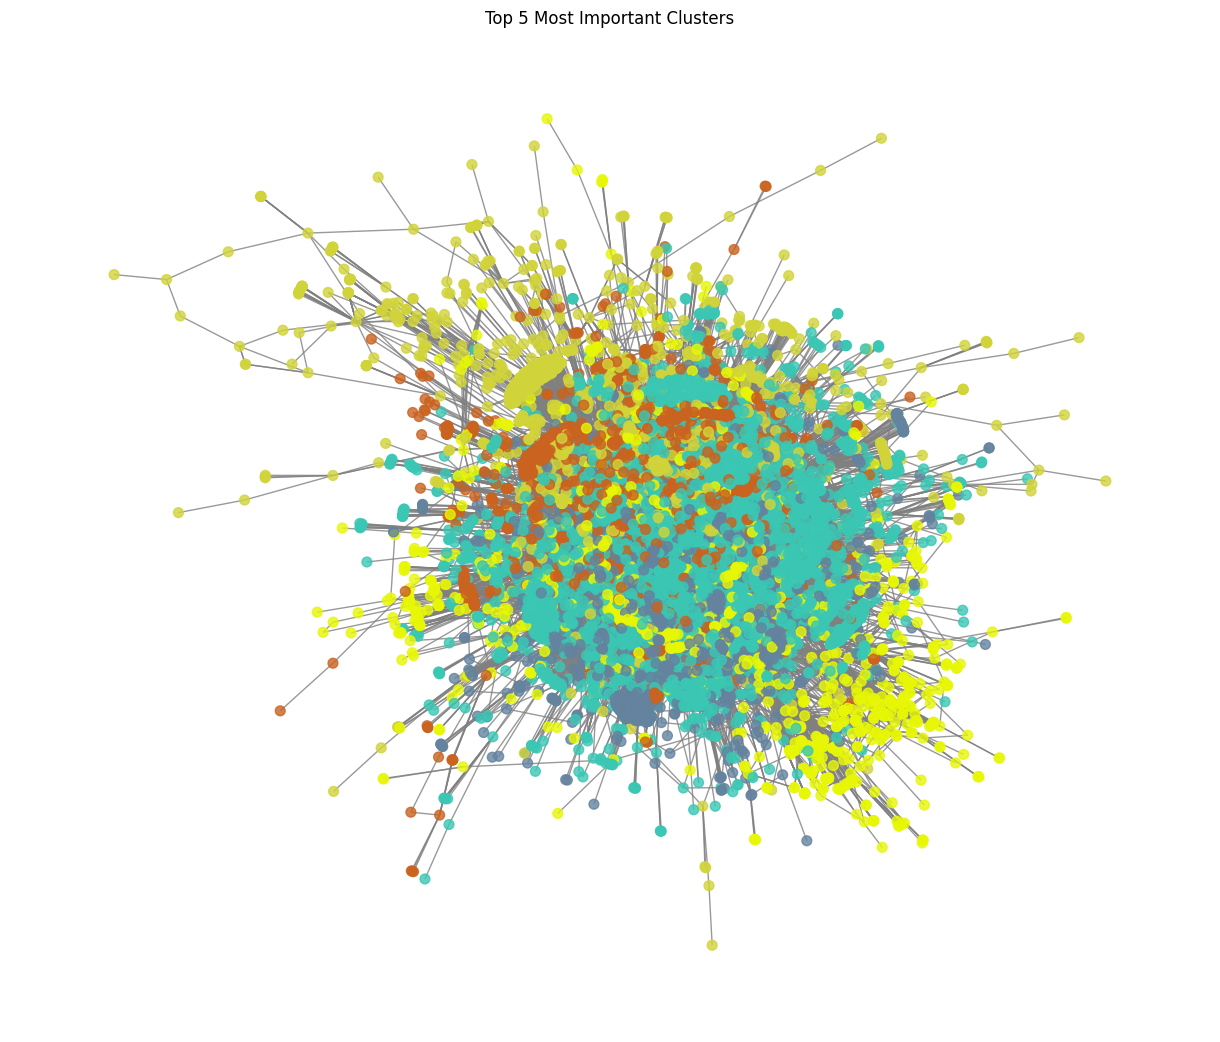

In [ ]:
# Based pagerank
visualize_top_clusters(G, important_clusters_based_pagerank)

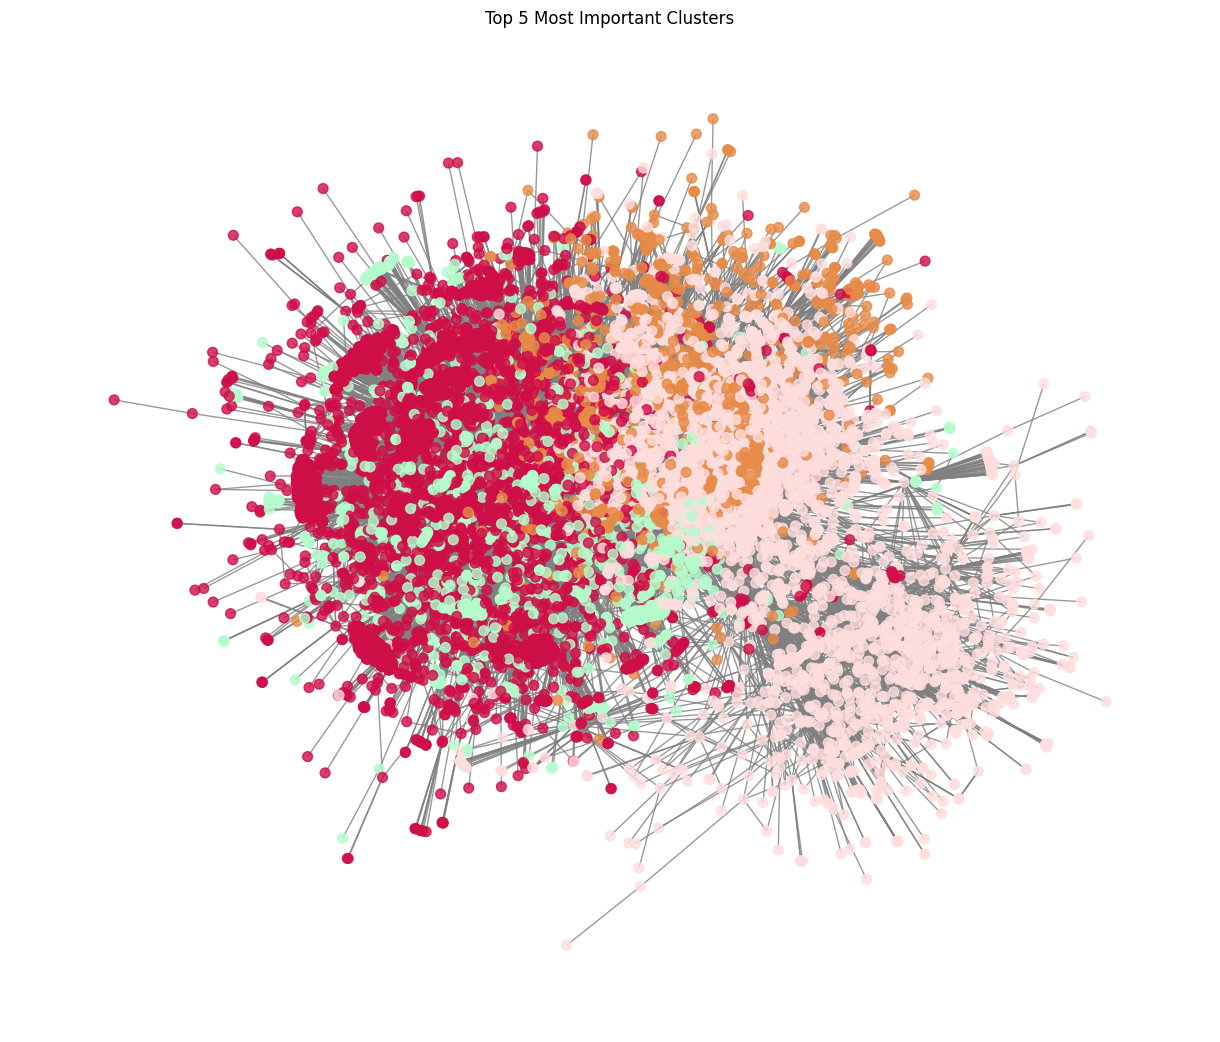

In [17]:
# Based all measures
visualize_top_clusters(G, important_clusters_based_all)